In [17]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.genmod.families.family import Poisson
from sklearn.linear_model import LinearRegression,RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import sklearn
import xlearn as xl



In [6]:
df=pd.read_csv('first_trend_df_1117.csv')

In [7]:
con=['views','likes', 'dislikes', 'comment_count','date_delta','d0', 'd1',
       'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12',
       'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20', 'd21', 'd22',
       'd23', 'd24','tagsLength','pLikes',
       'pDislikes', 'pComment_count']

cat=['comments_disabled', 'ratings_disabled',  'ratings_disabled','Autos & Vehicles', 'Comedy', 'Education',
       'Entertainment', 'Film & Animation', 'Gaming', 'Howto & Style', 'Music',
       'News & Politics', 'Nonprofits & Activism', 'People & Blogs',
       'Pets & Animals', 'Science & Technology', 'Shows', 'Sports',
       'Travel & Events', 'top100Channel', 'top500Channel',]

In [59]:
x = df.drop(['Unnamed: 0', 'video_id', 'trending_date', 'channel_title','category_id',
               'thumbnail_link', 'publish_date','app_time','tags2','category','top10Channel'], 
               axis = 1)
x['pLikes']=x['likes']/x['views']
x['pDislikes']=x['dislikes']/x['views']
x['pComment_count']=x['comment_count']/x['views']
#y_con = df['app_time']-1
y_con = df['app_time']
y_con=np.log(y_con)
y_cat=df['app_time']>=2
y_cat[y_cat==True]=1
y_cat[y_cat==False]=0

x[cat]=x[cat].astype('int32')
ss=sklearn.preprocessing.StandardScaler()
x[con]=ss.fit_transform(x[con])

np.mean(y_cat)

0.88928

In [39]:
from scipy.stats import boxcox

In [55]:
y_con=boxcox(y_con)[0]

/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


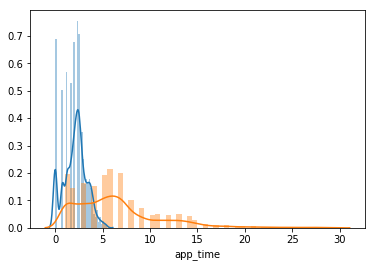

In [46]:
sns.distplot(boxcox(y_con)[0])
sns.distplot(y_con)
plt.show()

In [61]:
np.random.seed(2018)
x_train, x_test, y_train, y_test = train_test_split(x, y_con, test_size=0.2, random_state=42)

In [5]:
x.head(2)

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,date_delta,d0,d1,...,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events,top100Channel,top500Channel,pLikes,pDislikes,pComment_count
0,-0.151260,-0.243540,-0.104973,-0.198973,False,False,False,-0.083899,-1.423836,0.625003,...,0,0,0,0,0,False,False,-0.776858,-0.306920,-0.739481
1,-0.106064,-0.261492,-0.114666,-0.207158,False,False,False,0.402982,-0.850054,-0.367301,...,0,0,0,0,0,False,False,-0.944923,-0.366281,-0.797331


In [6]:
x.columns

Index(['views', 'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'date_delta', 'd0', 'd1',
       'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12',
       'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20', 'd21', 'd22',
       'd23', 'd24', 'tagsLength', 'Autos & Vehicles', 'Comedy', 'Education',
       'Entertainment', 'Film & Animation', 'Gaming', 'Howto & Style', 'Music',
       'News & Politics', 'Nonprofits & Activism', 'People & Blogs',
       'Pets & Animals', 'Science & Technology', 'Shows', 'Sports',
       'Travel & Events', 'top100Channel', 'top500Channel', 'pLikes',
       'pDislikes', 'pComment_count'],
      dtype='object')

/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


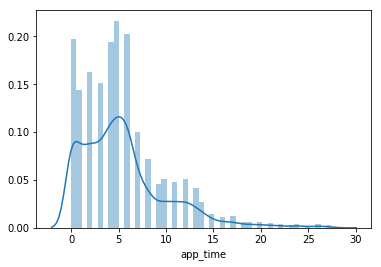

In [7]:
sns.distplot(y_con)
plt.show()

### Linear Regression

In [62]:
LR=LinearRegression().fit(x_train,y_train)
print(LR.score(x_train,y_train))
print(LR.score(x_test,y_test))


0.13212203112261567
0.11561188516813559


In [65]:
print(sklearn.metrics.mean_absolute_error(np.exp(y_train),np.exp(LR.predict(x_train))))
print(sklearn.metrics.mean_absolute_error(np.exp(y_test),np.exp(LR.predict(x_test))))


3.1376765081996325
3.3315254687659093


/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


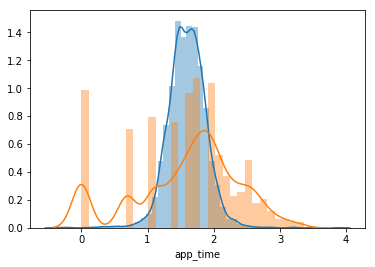

In [66]:
sns.distplot(LR.predict(x_train))
sns.distplot(y_train)
plt.show()

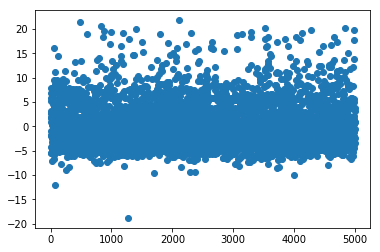

In [15]:
plt.scatter(range(len(x_train)),y_train-LR.predict(x_train))
plt.show()

In [16]:
W,V=np.linalg.eig(x_train.corr())
W

array([ 9.92481609e+00,  7.10236696e+00,  3.09184335e+00,  2.19403759e+00,
        1.79753582e+00,  1.66042348e+00,  1.46155679e+00,  1.37201052e+00,
        1.33532310e+00,  1.27518947e+00,  1.18153141e+00,  1.12895814e+00,
        8.13234331e-01,  8.58726120e-01,  1.08690921e+00,  9.20391027e-01,
        1.06826980e+00,  9.52509691e-01,  1.04893398e+00,  1.04412393e+00,
        1.03145330e+00,  9.79492822e-01,  9.88838660e-01,  1.02057400e+00,
        1.01455562e+00,  1.00907411e+00,  1.00193442e+00,  6.74857324e-01,
        6.82121899e-01,  6.01004715e-01,  5.42701288e-01,  5.14875515e-01,
        4.46590932e-01,  4.14432469e-01,  3.45689721e-01,  3.27308839e-01,
        2.71551590e-01,  2.50021888e-01,  2.35984584e-01,  2.19578085e-01,
        1.87678305e-01,  1.61764242e-01,  1.23884730e-01,  1.10558384e-01,
        1.89761110e-02,  2.77046215e-02,  3.53183783e-02,  8.89877793e-02,
        4.55941329e-02,  5.04945643e-02,  5.20680095e-02,  5.92370348e-02,
        6.76307483e-02,  

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train[con].values, i) for i in range(x_train[con].shape[1])]
vif["features"] = x_train[con].columns

In [27]:
ridge=RidgeCV(np.arange(0.00001,2,50),store_cv_values=True ).fit(x_train,y_train)


In [28]:
ridge.score(x_train,y_train)

0.11499901582109284

In [63]:
print(sklearn.metrics.mean_absolute_error(y_train,ridge.predict(x_train)))
print(sklearn.metrics.mean_absolute_error(y_test,ridge.predict(x_test)))


3.205401585565383
3.3702177828064785


/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


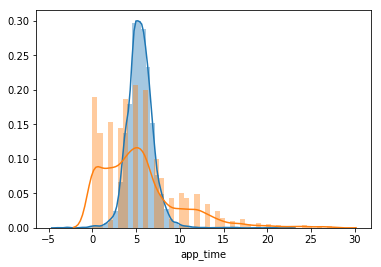

In [85]:
sns.distplot(ridge.predict(x_train))
sns.distplot(y_train)
plt.show()

### FM

In [121]:
fm = xl.FMModel(task='reg', init=0.004
                ,lr=0.12, reg_lambda=0.00901
                ,metric='mae', opt='adagrad'
                ,k=4, epoch=1, stop_window=4)

In [122]:
fm.fit(x_train,y_train,eval_set=[x_test,y_test],is_lock_free=False)

In [124]:
print('Prediction of Factorization Machine')

print('MAE of Train: ',sklearn.metrics.mean_absolute_error(np.exp(y_train),np.exp(fm.predict(x_train))))

print('MAE of Test: ',sklearn.metrics.mean_absolute_error(np.exp(y_test),np.exp(fm.predict(x_test))))

Prediction of Factorization Machine
MAE of Train:  3.0948401581333504
MAE of Test:  3.232854183244559


In [71]:
sklearn.metrics.r2_score(y_train,fm.predict(x_train))

0.1356224161223114

/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


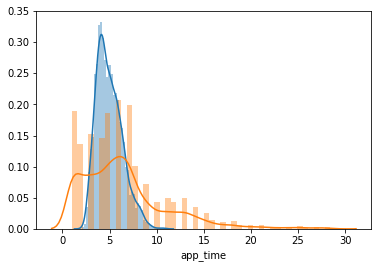

In [77]:
sns.distplot(np.exp(fm.predict(x_train)))
sns.distplot(np.exp(y_train))
plt.show()

### Poisson

In [113]:
dropCon=['d20','d14','d19','pDislikes','d11','d10','d24'
      ,'d7','d5','d4','d1','d0']
x_train1=x_train.drop(dropCon,axis=1)

In [97]:
import statsmodels.api as sm
import statsmodels.genmod.families.family as smf

In [114]:
x_train1=sm.add_constant(x_train[con].drop(dropCon,axis=1).values)
poisson=sm.GLM(y_train.values, x_train1, family=smf.Poisson())
res=poisson.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4977
Model Family:                 Poisson   Df Model:                           22
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6766.2
Date:                Sat, 17 Nov 2018   Deviance:                       2576.6
Time:                        23:12:13   Pearson chi2:                 1.85e+03
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4529      0.011     39.837      0.000       0.431       0.475
x1             0.0770      0.017      4.622      0.000       0.044       0.110
x2            -0.0290      0.028     -1.043      0.297      -0.083       0.025
x3            -0.0052      0.017     -0.310      0.756      -0.038       0.028
x4            -0.0025      0.029     -0.087      0.931      -0.059       0.054
x5            -0.1090      0.014     -7.542      0.000      -0.137      -0.081
x6             0.0046      0.016      0.280      0.779      -0.028       0.037
x7             0.0474      0.019      2.489      0.013       0.010       0.085
x8             0.0116      0.021      0.548      0.584      -0.030       0.053
x9             0.0107      0.015      0.706      0.480      -0.019       0.041
x10            0.0163      0.016      0.995      0.320      -0.016       0.048
x11           -0.0314      0.033     -0.952      0.341      -0.096       0.033
x12           -0.0086      0.030     -0.287      0.774      -0.067       0.050
x13           -0.0276      0.025     -1.112      0.266      -0.076       0.021
x14            0.0259      0.029      0.893      0.372      -0.031       0.083
x15            0.0074      0.016      0.478      0.633      -0.023       0.038
x16            0.0179      0.042      0.427      0.669      -0.064       0.100
x17           -0.0419      0.036     -1.156      0.248      -0.113       0.029
x18            0.0146      0.018      0.817      0.414      -0.020       0.050
x19            0.0253      0.028      0.905      0.365      -0.029       0.080
x20           -0.0028      0.011     -0.250      0.802      -0.025       0.019
x21            0.0915      0.014      6.477      0.000       0.064       0.119
x22           -0.0086      0.014     -0.605      0.545      -0.037       0.019
==============================================================================
"""

In [116]:

print(sklearn.metrics.mean_absolute_error(np.exp(y_train),np.exp(poisson.predict(res.params,x_train1))))

print(sklearn.metrics.mean_absolute_error(np.exp(y_test),np.exp(poisson.predict(res.params,sm.add_constant(x_test[con].drop(dropCon,axis=1).values)))))

3.2347187258520744
4.0190871001180275


/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


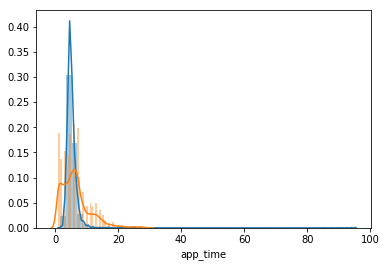

In [78]:
sns.distplot(np.exp(poisson.predict(res.params,x_train1)))
sns.distplot(np.exp(y_train))
plt.show()

### lightGBM

In [80]:
import lightgbm as lgb

In [81]:
NUM_ROUNDS = 20000
VERBOSE_EVAL = 250
STOP_ROUNDS = 250
N_SPLITS = 5

def lgbmFit(x,y):
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=1)
    
    ## Model parameters
    params = {"objective" : "regression", "metric" : "rmse", "max_depth": 5, "min_child_samples": 40, "reg_alpha": 0.4, 
            "reg_lambda": 0.1, "num_leaves" : 30, "learning_rate" : 0.01, "subsample" : 0.8, "colsample_bytree" : 0.97}
    
    model = lgb.LGBMRegressor(**params, n_estimators = NUM_ROUNDS, nthread = 4, n_jobs = -1)
    
    model.fit(x_train, y_train, 
             eval_set=[(x_train, y_train), (x_test, y_test)], eval_metric='rmse',
            verbose=VERBOSE_EVAL, early_stopping_rounds=STOP_ROUNDS)
    return model

In [82]:
modelR=lgbmFit(x_train,y_train)

Training until validation scores don't improve for 250 rounds.
[250]	training's rmse: 0.642178	valid_1's rmse: 0.721794
[500]	training's rmse: 0.605237	valid_1's rmse: 0.717506
[750]	training's rmse: 0.57495	valid_1's rmse: 0.71521
[1000]	training's rmse: 0.544995	valid_1's rmse: 0.716292
Early stopping, best iteration is:
[799]	training's rmse: 0.569775	valid_1's rmse: 0.715073


In [90]:
res_train=np.exp(modelR.predict(x_train))
res_test=np.exp(modelR.predict(x_test))


In [91]:
print(sklearn.metrics.mean_absolute_error(np.exp(y_train),res_train))

print(sklearn.metrics.mean_absolute_error(np.exp(y_test),res_test))

2.552477571149373
3.0833604363711435


/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


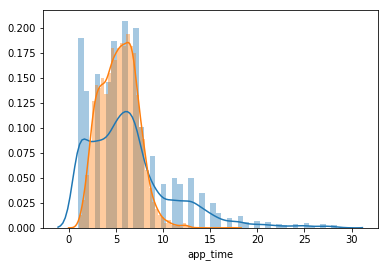

In [93]:
sns.distplot(np.exp(y_train))
sns.distplot(res_train)
plt.show()

/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/dylanhuang1224/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


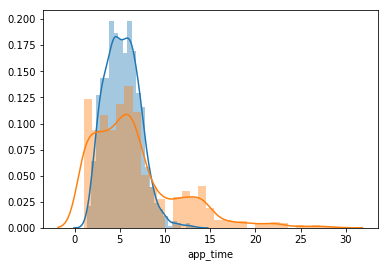

In [95]:
sns.distplot(res_test)
sns.distplot(np.exp(y_test))

plt.show()